INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprw0ucvg0/1jdq_sht.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprw0ucvg0/bk9z6tqr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77421', 'data', 'file=/tmp/tmprw0ucvg0/1jdq_sht.json', 'init=/tmp/tmprw0ucvg0/bk9z6tqr.json', 'output', 'file=/tmp/tmprw0ucvg0/prophet_modelg3s75flb/prophet_model-20250611125526.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:55:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:55:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


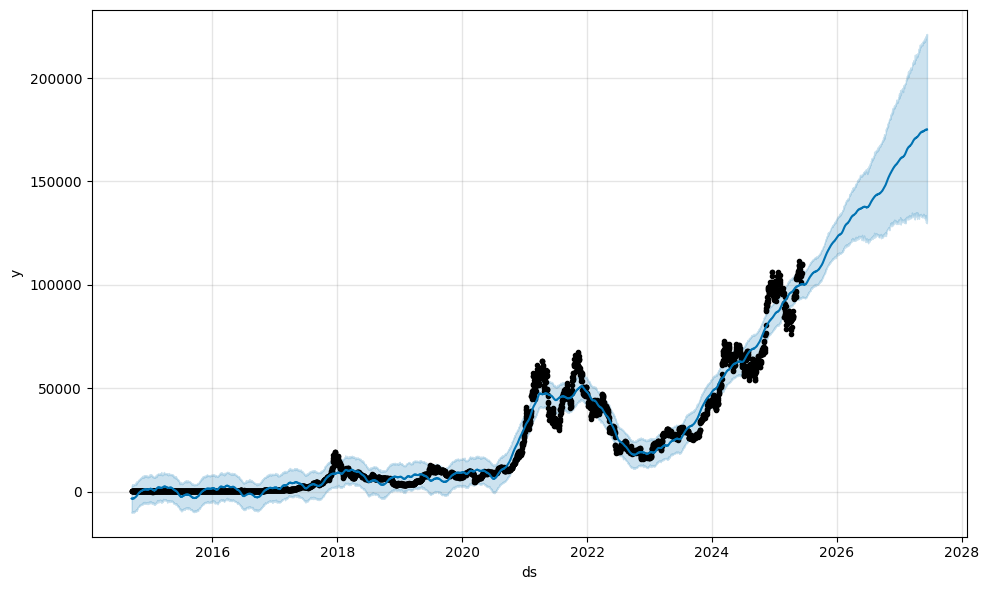

Difference between future and past average prices: 75335.44628323172


In [ ]:
import pandas as pd
from prophet import Prophet
import yfinance as yf
import matplotlib.pyplot as plt

def stock(n):
    # Fetch historical data for the longest available period
    ticker = yf.Ticker(n)
    hist = ticker.history(period="max")

    # Prepare data for Prophet model
    hist = hist[['Close']].reset_index().rename(columns={'Date': 'ds', 'Close': 'y'})
    hist['ds'] = pd.to_datetime(hist['ds']).dt.tz_localize(None)  # Remove timezone information

    # Train the Prophet model
    m = Prophet()
    m.fit(hist)

    # Forecast for the next 2 years (730 days)
    future = m.make_future_dataframe(periods=730)
    forecast = m.predict(future)

    # Plot the forecast
    fig = m.plot(forecast)
    plt.show()

    # Calculate past and future averages
    history_past = ticker.history(period="2y")
    average_price_past = history_past["Close"].mean()
    average_price_future = forecast["yhat"][-730:].mean()

    return average_price_future - average_price_past

# Test the function
difference = stock('BTC-USD')
print("Difference between future and past average prices:", difference)